In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Uyarıları kapat
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv(r"C:\Users\Alperen\Desktop\Programlama\Proje\Python Proje\CarDataset\train-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Bazı veri tipleri istenildiği gibi değildir. Bu nedenle "kmpl", "cc", "bhp" ifadeleri kaldırılmalıdır.

In [6]:
df.describe(include='number')
# Sayısal sütunların açıklanması

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.describe(include='object')
# Nesne sütunlarının açıklanması

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


<hr>

<h5> Verinin Hazırlanması </h5>

In [8]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

Kullanılmayacak olan "Number: 0" sütunu ve çok fazla eksik veri içeren "New_Price" sütunu kaldırıldı.

In [10]:
df.duplicated().sum()

0

Tekrarlanan veri yok.

In [11]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [12]:
df['Power'] = df['Power'].replace('null bhp',None)
print('"null nhp" olarak görünen veri sayısı :', (df['Power'] == 'null bhp').sum())
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

"null nhp" olarak görünen veri sayısı : 0


In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [14]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Dönüştürme işlemi tamamlandı. Ancak yukarıda görüldüğü gibi eksik verilerin düzenlenmesi gerekir. Eksik verilerin kaldırılması istenmeyen sonuçlara yol açabileceğinden, onu ortalama veya medyan ile doldurmak daha iyi olacaktır.

In [15]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)

In [16]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<hr>

<h5> Aykırı Değerler </h5>

In [17]:
df.shape

(6019, 12)

Bir gözlemin sadece aykırı olduğu için kaldırılması kabul edilebilir bir yaklaşım değildir. Bunlar meşru gözlemler olabilir ve onu bırakıp bırakmamaya karar vermeden önce aykırı olanın neden böyle olduğunu araştırmak önemlidir. Aykırı değerleri yalnızca aşağıdaki iki durumda kaldırmamıza izin verilir:

1-)Aykırı değer yanlış girilmiş veya ölçülen verilerden kaynaklanıyorsa
2-)Aykırı anlamlı bir ilişki yaratırsa
Sayısal veri türünde aykırı değerleri olan sütunlar incelendiğinde, işlemlerin yalnızca 'Kilometers_Driven' sütununda yapılması uygun olacaktır.

Aykırı değerleri belirlemek için IQR veya Z Puanı kullanılabilir.

In [18]:
z_scores = stats.zscore(df["Kilometers_Driven"])

# Z-Skorunu kullanarak aykırı değerleri belirleme
threshold = 2.5  # Genellikle 2.5 veya 3 seçilir
outliers = df['Kilometers_Driven'][abs(z_scores) > threshold]

outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

En yüksek değerin 6.500.000 olduğunu görebiliriz. Bu sayının diğer değerlere kıyasla gerçekten aşırı olduğu açıktır. Bu nedenle, belirli bir aralıktan sonraki veriler, veri kümesinden çıkarılarak sürece dahil edilmemelidir. Limit olarak 300.000'i seçmek mantıklı olacaktır.

In [19]:
df = df[df["Kilometers_Driven"] <= 300000]

In [20]:
df["Seats"].min()

0.0

Aynı zamanda koltuk sayısı incelendiğinde 0 koltuklu bir araca sahip olmanın bir anlamı olmayacağı için bu sıra kaldırılmalıdır.

In [21]:
df = df[df['Seats'] != 0]

<hr>

<h5> Düzenleme Özellikleri </h5>

In [22]:
df['Name'].nunique()

1874

In [23]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2927,Maruti Celerio ZXI AT,Jaipur,2016,30000,Petrol,Automatic,Second,23.1,998.0,67.04,5.0,4.25


In [24]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

"Name" sütunu, "split" metoduyla bölünerek "Company" ve "model" olarak ikiye bölündü.

In [25]:
df['Company'].nunique() , df['Model'].nunique()

(30, 215)

Modelleme aşamasında iki yeni sütun oluşturmak yararlı olabilir. Son olarak, sütun sırasını kategorik ve sayısal olarak düzenleyerek 5. adıma hazırlıklar yapılmalıdır.

<hr>

<h5> Keşif Amaçlı Veri Analizi </h5>

In [26]:
df.sample()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
3382,Hyderabad,2010,46000,Diesel,Automatic,First,11.8,2987.0,261.0,7.0,28.0,mercedes-benz,mercedes-benz r-class


Kategorik Değişkenler: 'Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission'

Sayısal Değişkenler: 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'

Sürekli Veriler için: Her özelliğin dağılımı hakkında bilgi edinmek için "Histogramlar" kullanılabilir. Bu, veri kümesinin dağılımının merkezi eğilimini ve şeklini anlamamızı sağlar.

Kategorik Veriler için: Her kategorinin sıklığını görselleştirmek için "Sayım Grafiği" kullanılabilir. Bu, ilgili özellik içindeki her kategorinin öneminin net bir temsilini sağlar.

<hr>

<h5>Kategorik Değişkenler için Tek Değişkenli Analiz</h5>

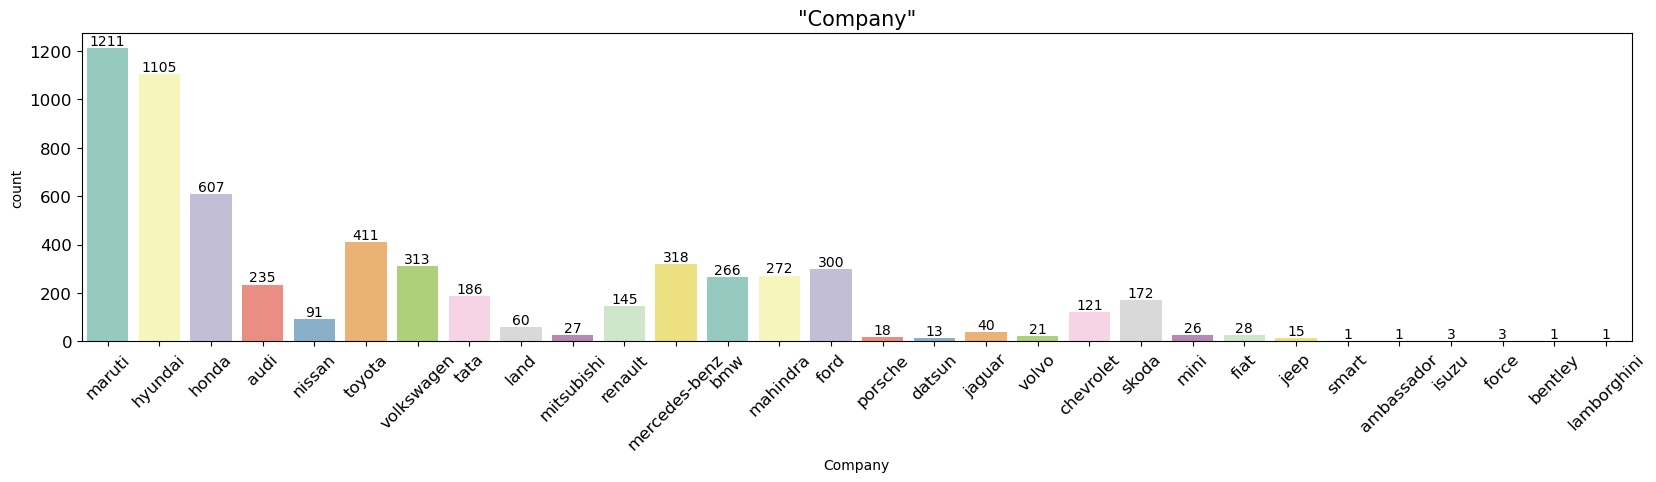

In [27]:
plt.figure(figsize=(20, 4), dpi=100)  # Şeklin boyutunu (genişlik: 20 birim, yükseklik: 4 birim) ve çözünürlüğünü ayarlar
graph = sns.countplot(data=df, x='Company', palette = 'Set3')  # 'Company' sütunundaki kategorik verilerin frekansını içeren bir countplot oluşturur
plt.xticks(rotation=45, fontsize=12)  # x eksenindeki etiketlerin 45 derece döndürülmesini ve font boyutunun ayarlanmasını sağlar
plt.yticks(fontsize=12)  # y eksenindeki etiketlerin font boyutunu ayarlar
plt.title('"Company"', fontsize=15)  # Grafik başlığını belirler
for cont in graph.containers:
        graph.bar_label(cont)  # Her bir çubuğun üstüne frekans değerlerini ekler
plt.show()  # Grafikleri gösterir

In [28]:
df.Model.value_counts()

Model
maruti swift          353
honda city            269
hyundai i20           246
hyundai verna         170
toyota innova         164
                     ... 
fiat petra              1
volkswagen beetle       1
ambassador classic      1
smart fortwo            1
jaguar f                1
Name: count, Length: 215, dtype: int64

In [29]:
# 10dan büyük olanları alma
threshold = 10
counts = df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = df[df['Model'].isin(filtered_models)]

"Model" sütununun daha iyi anlaşılması için frekansları 10'dan küçük olan modeller grafiğe dahil edilmedi.

In [30]:
df.Model.value_counts()

Model
maruti swift              353
honda city                269
hyundai i20               246
hyundai verna             170
toyota innova             164
                         ... 
tata tiago                 11
mercedes-benz gl-class     11
mercedes-benz s            10
chevrolet spark            10
hyundai getz               10
Name: count, Length: 104, dtype: int64

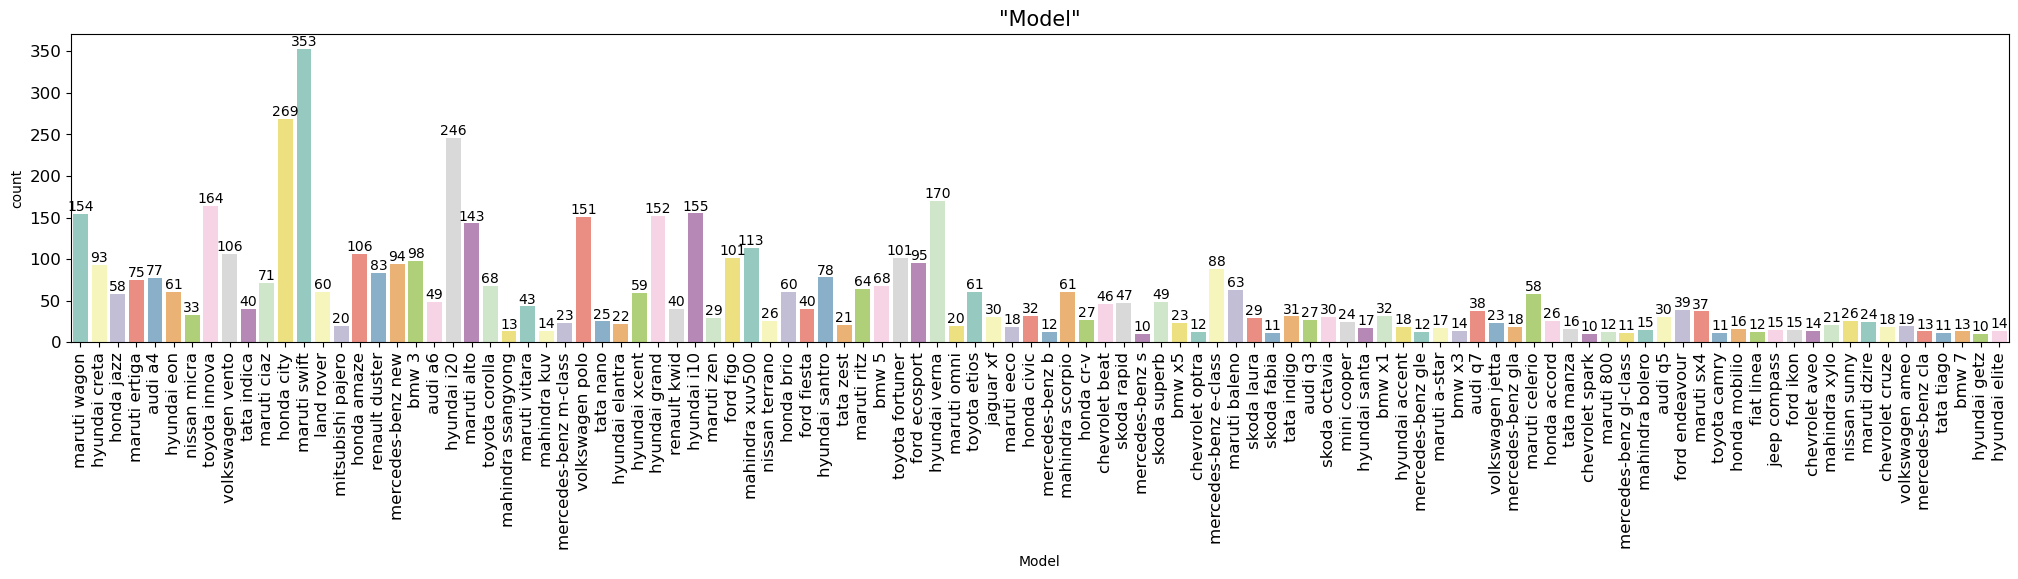

In [31]:
plt.figure(figsize=(25, 4), dpi=100)
graph = sns.countplot(data=df, x='Model', palette = 'Set3') 
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Model"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont) 
plt.show()

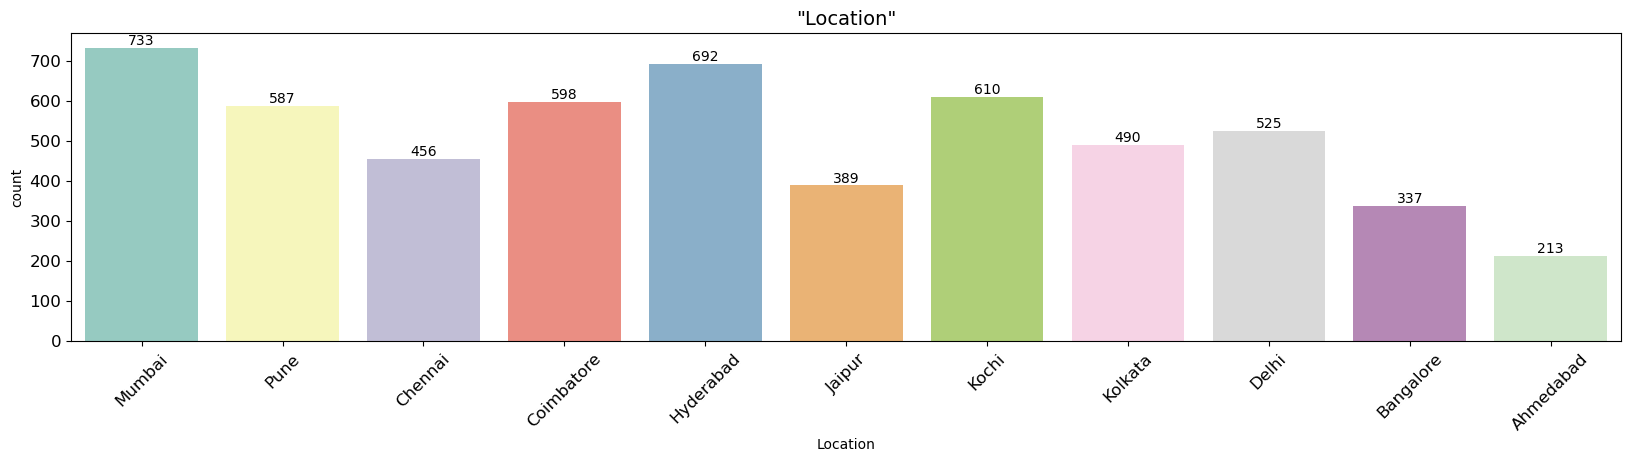

In [32]:
plt.figure(figsize=(20, 4), dpi=100) 
graph = sns.countplot(data=df, x='Location', palette = 'Set3')
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=14)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

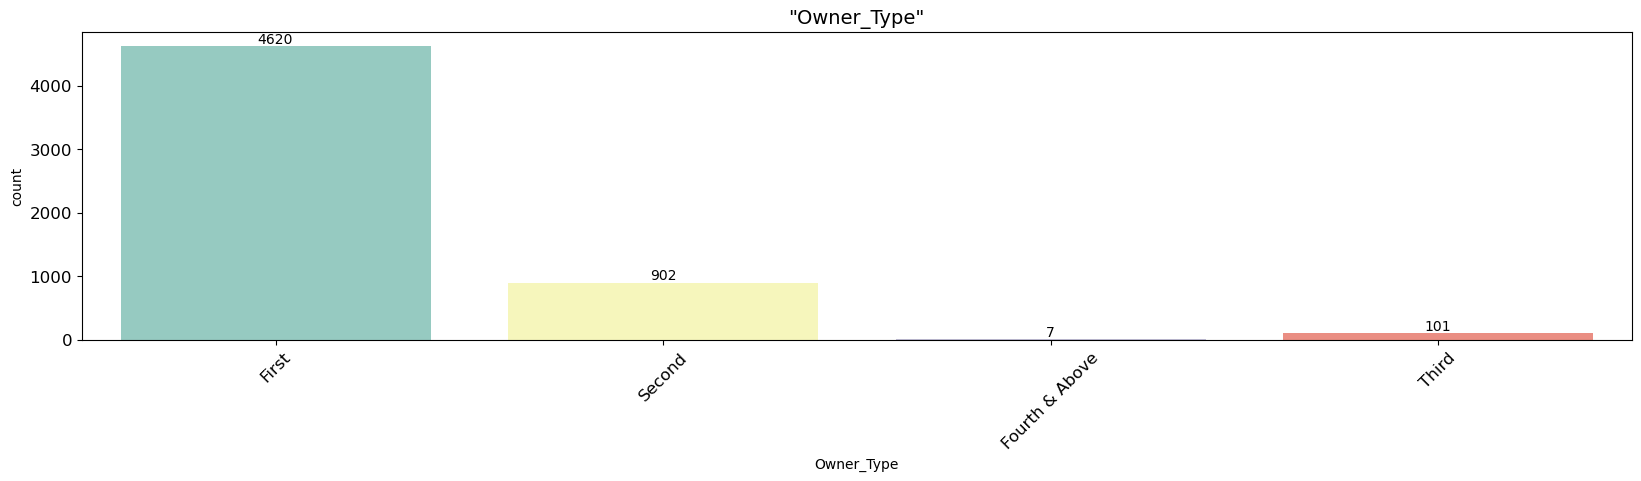

In [33]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Owner_Type', palette = 'Set3') 
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12) 
plt.title('"Owner_Type"', fontsize=14)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

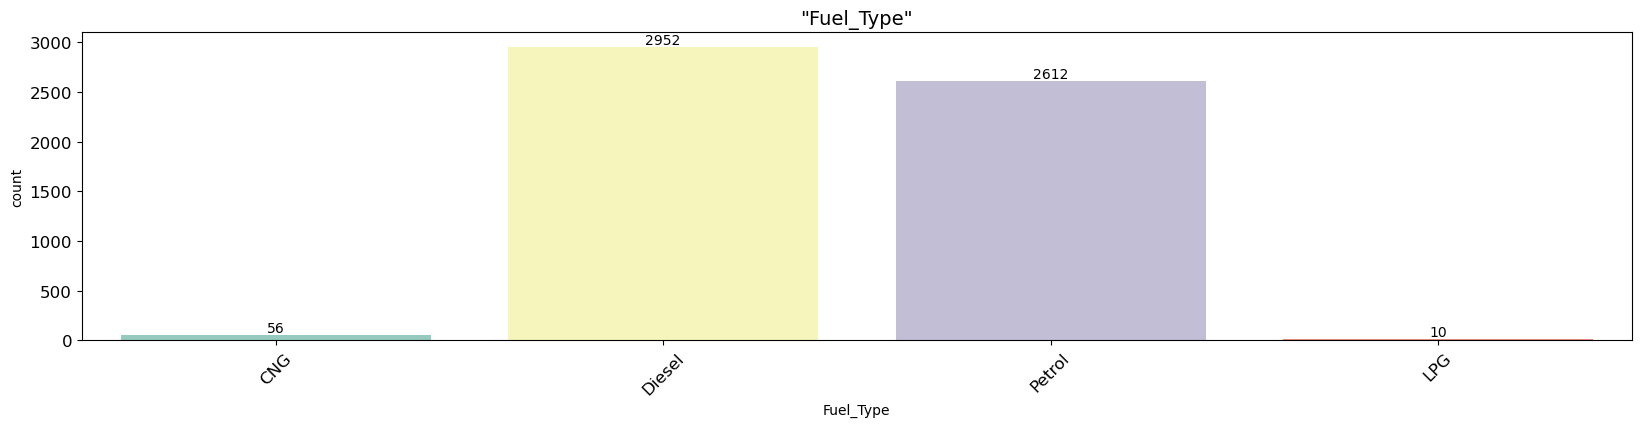

In [34]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type', palette = 'Set3') 
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12) 
plt.title('"Fuel_Type"', fontsize=14)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

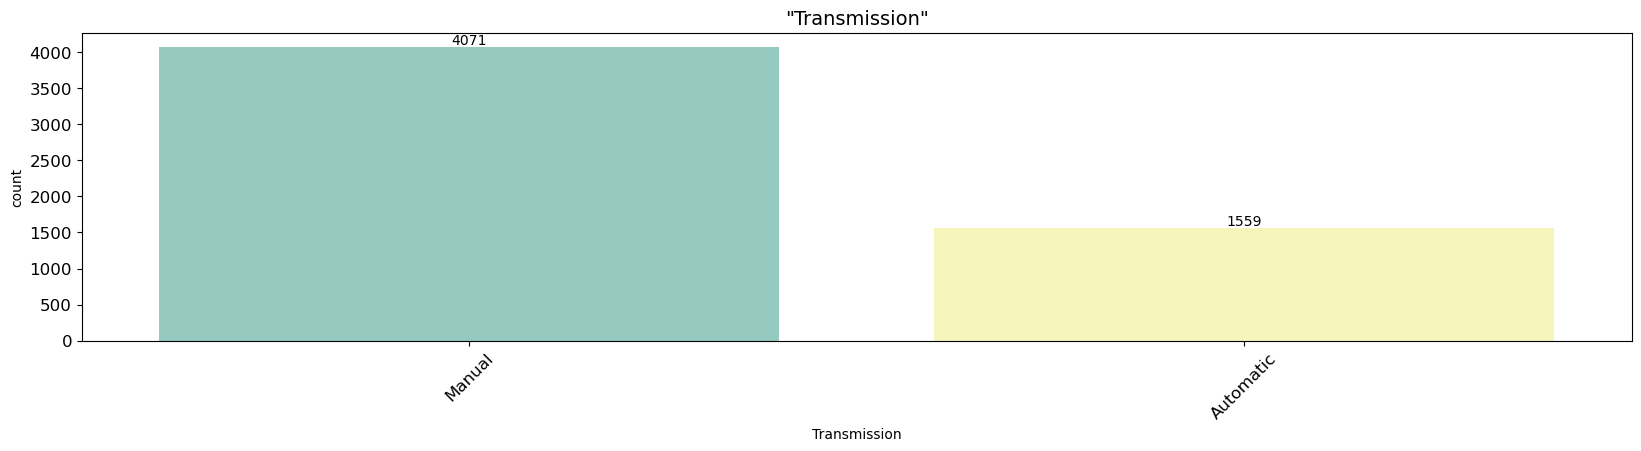

In [35]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Transmission', palette = 'Set3') 
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12) 
plt.title('"Transmission"', fontsize=14)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<hr>

<h5> Sayısal Değişkenler için Tek Değişkenli Analiz </h5>

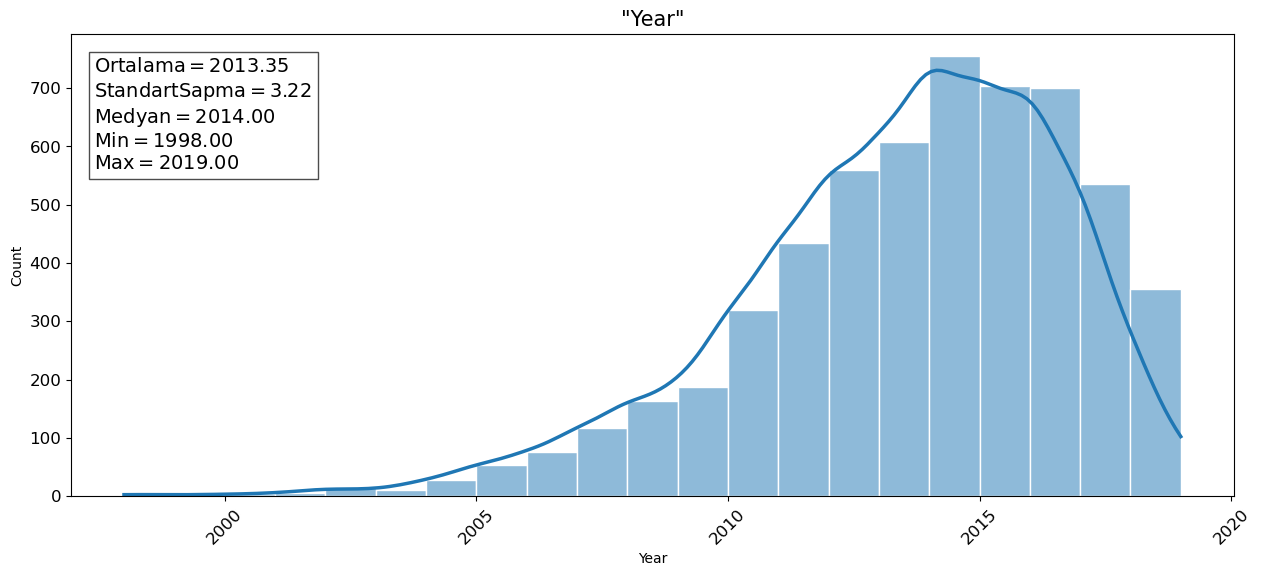

In [36]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Year' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Year'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Year'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{Min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Year'].max()

))

plt.text(0.02, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='left')

plt.show()

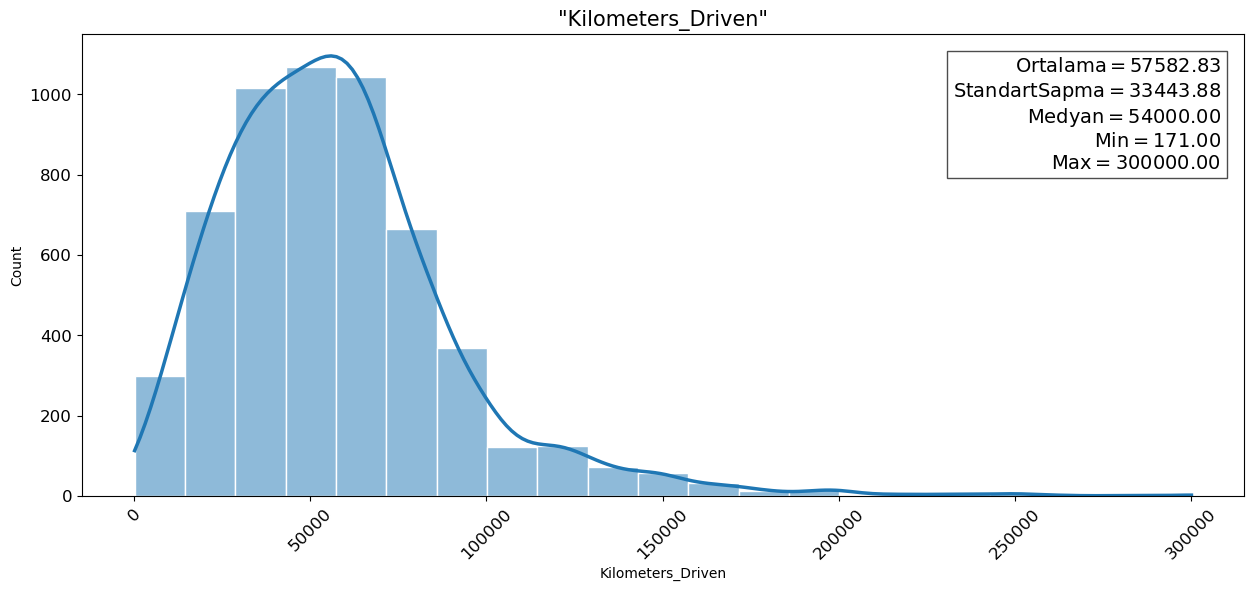

In [37]:
plt.figure(figsize=(15, 6), dpi=100)
grap = sns.histplot(data=df, x='Kilometers_Driven', bins=21,
                    kde=True, edgecolor='white', alpha=0.5, line_kws={'lw':2.5})

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Kilometers_Driven"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' % df['Kilometers_Driven'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' % df['Kilometers_Driven'].std(),
    r'$\mathrm{Medyan}=%.2f$' % np.median(df['Kilometers_Driven']),
    r'$\mathrm{Min}=%.2f$' % df['Kilometers_Driven'].min(),
    r'$\mathrm{Max}=%.2f$' % df['Kilometers_Driven'].max()
))

plt.text(0.98, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='right')

plt.show()


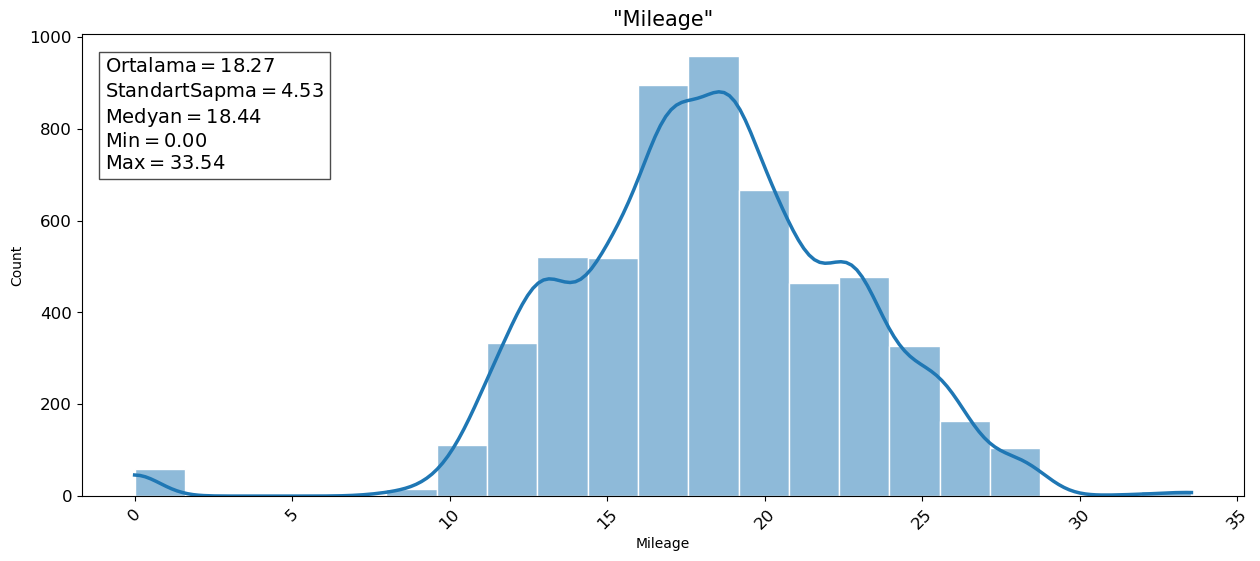

In [38]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Mileage' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Mileage"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Mileage'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Mileage'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Mileage']),
    r'$\mathrm{Min}=%.2f$' %df['Mileage'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Mileage'].max()

))

plt.text(0.02, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='left')

plt.show()

In [39]:
df.Engine.value_counts()

Engine
1197.0    599
1248.0    486
1498.0    293
998.0     259
1198.0    218
         ... 
2720.0      1
2487.0      1
5461.0      1
2694.0      1
1797.0      1
Name: count, Length: 113, dtype: int64

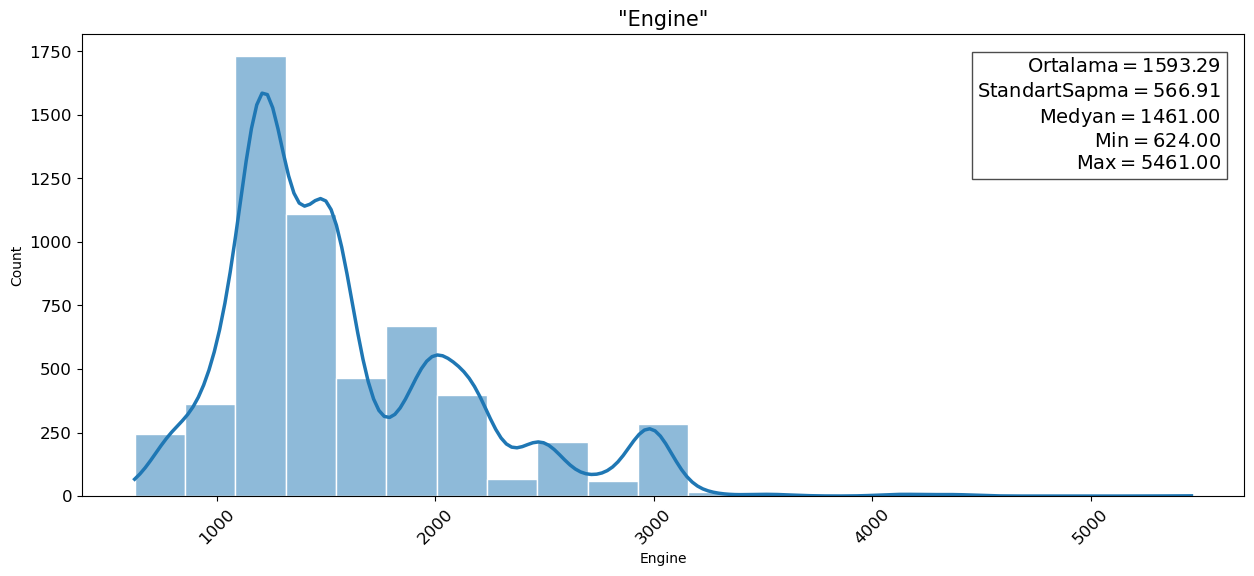

In [40]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Engine' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Engine"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Engine'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Engine'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Engine']),
    r'$\mathrm{Min}=%.2f$' %df['Engine'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Engine'].max()

))

plt.text(0.98, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='right')

plt.show()

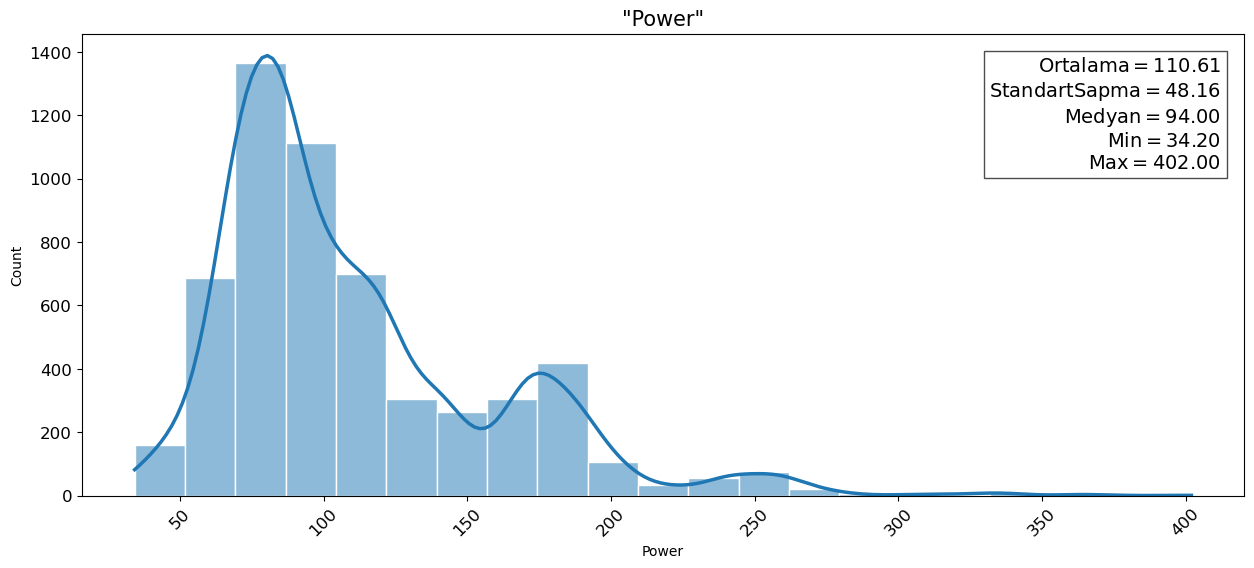

In [41]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Power' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Power"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Power'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Power'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Power']),
    r'$\mathrm{Min}=%.2f$' %df['Power'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Power'].max()

))

plt.text(0.98, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='right')

plt.show()

In [42]:
df.Seats.value_counts()

Seats
5.000000    4776
7.000000     598
8.000000     123
4.000000      70
5.278735      36
6.000000      25
9.000000       2
Name: count, dtype: int64

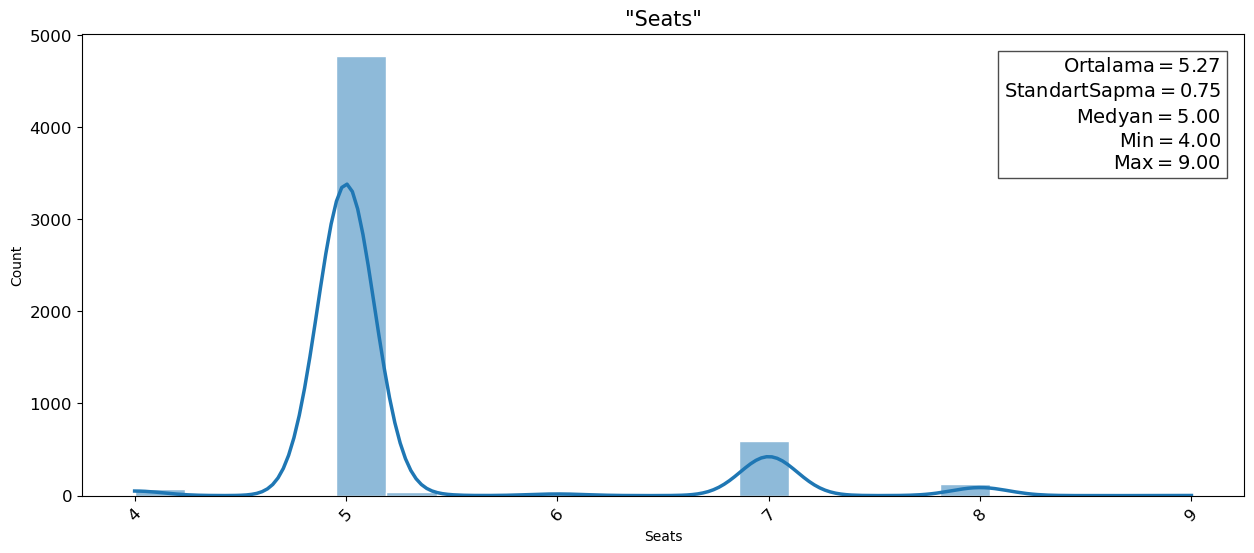

In [43]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Seats' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Seats"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Seats'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Seats'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Seats']),
    r'$\mathrm{Min}=%.2f$' %df['Seats'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Seats'].max()

))

plt.text(0.98, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='right')

plt.show()

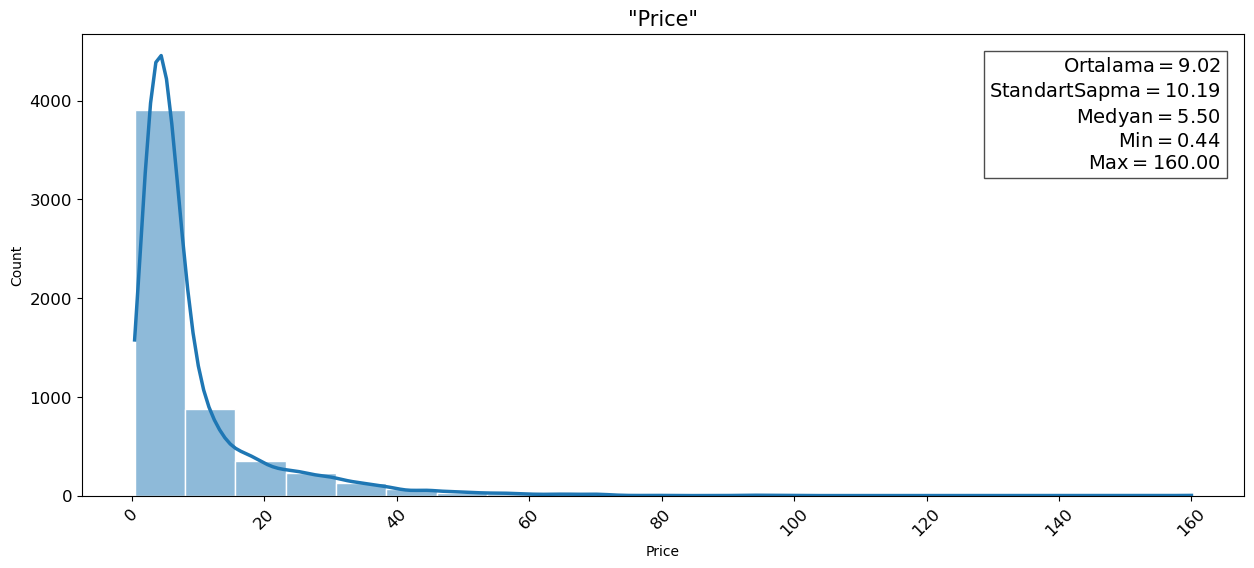

In [44]:
plt.figure(figsize=(15, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Price' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Price"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Price'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Price'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Price']),
    r'$\mathrm{Min}=%.2f$' %df['Price'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Price'].max()

))

plt.text(0.98, 0.95, textstr, transform=grap.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7),
         verticalalignment='top', horizontalalignment='right')

plt.show()

Grafikler genellikle sağa doğru eğimlidir. Genel olarak, ortalama, medyan ve mod değerleri birbirinden farklı olabilir. Bu durumda, daha yüksek değerler veri setinde daha düşük yoğunlukta bulunurken, daha düşük değerler daha sık görülür.

<hr>

<h5>Kategorik Değişkenler için Çift Değişkenli Analiz</h5>

Sürekli Veriler için: iki farklı sürekli değişken arasındaki ilişkiyi göstermek için "Dağılım Grafiği" kullanılabilir. Her nokta, veri kümesindeki bir gözlem veya veri noktasına karşılık gelir.

Kategorik Veriler için: Kategorik bir değişkenin sürekli bir değişkenle ilişkisini göstermek için "Şerit" kullanılabilir. Şerit çizimi, noktaların yatay bir çizgi boyunca dağıtıldığı bir eksen üzerindeki noktaları gösterir. Bu noktalar genellikle veri dağılımını daha iyi anlamak ve olası kümeleri görselleştirmek için kullanılır. Her nokta, veri noktalarının gerçek değerini temsil eder.

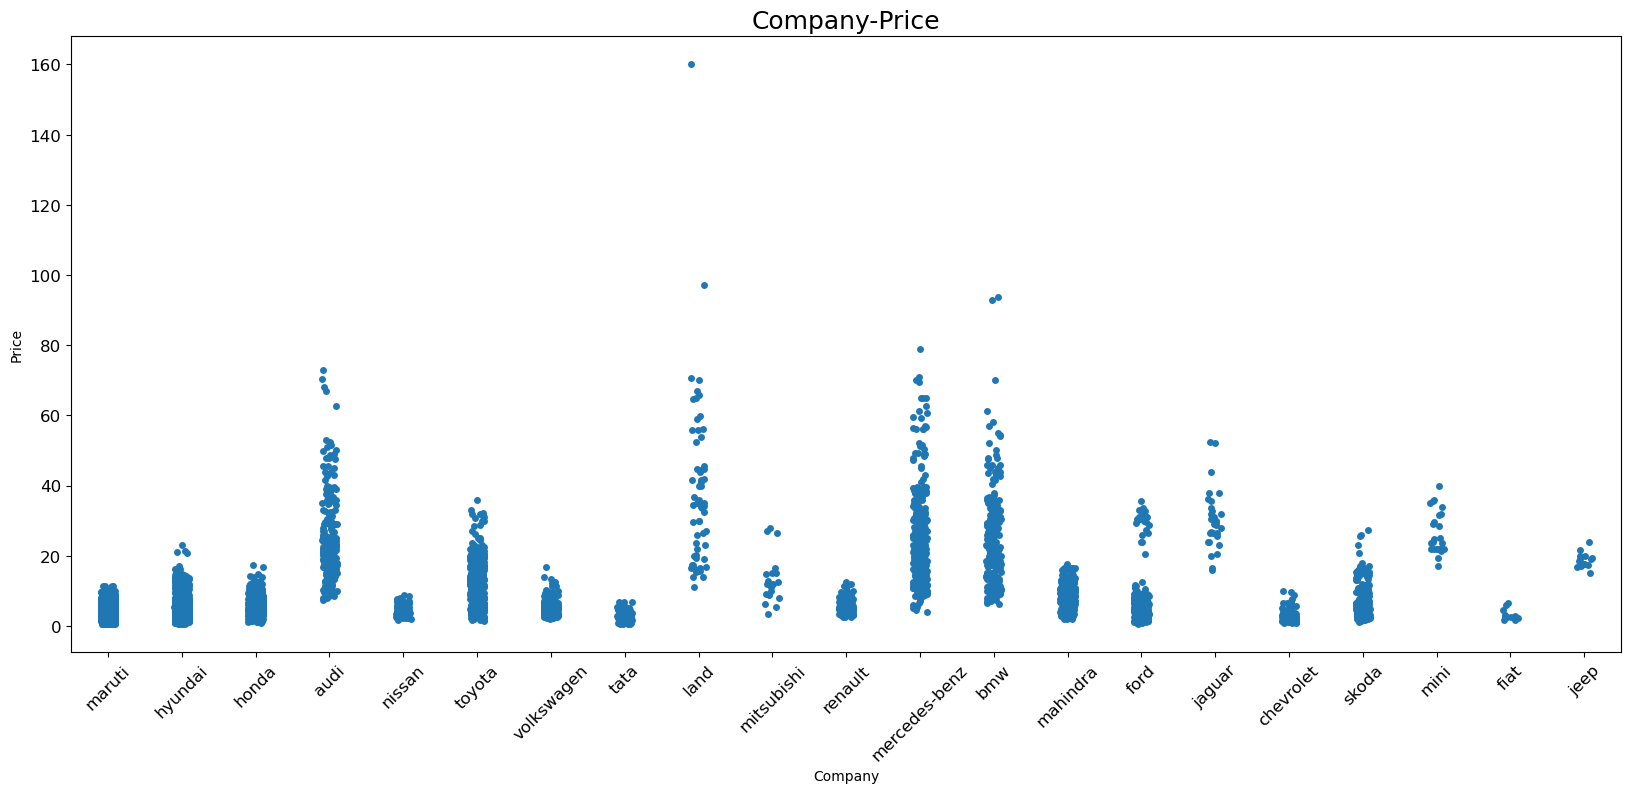

In [45]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Company', y='Price') 
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Company-Price', fontsize=18)
plt.show()

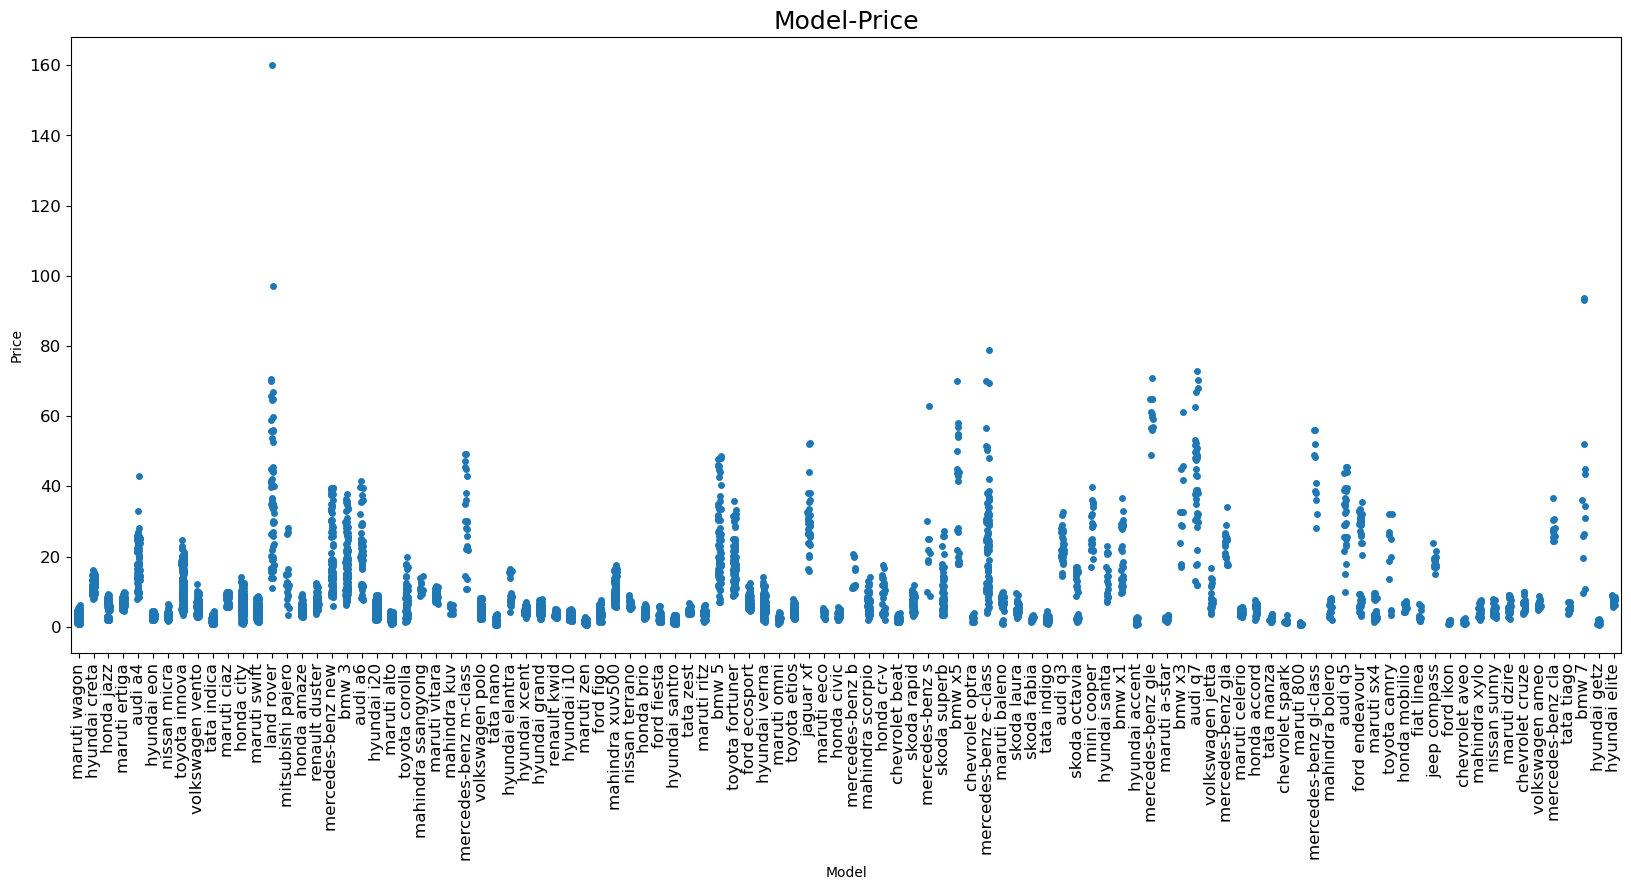

In [46]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Model', y='Price') 
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model-Price', fontsize=18)
plt.show()

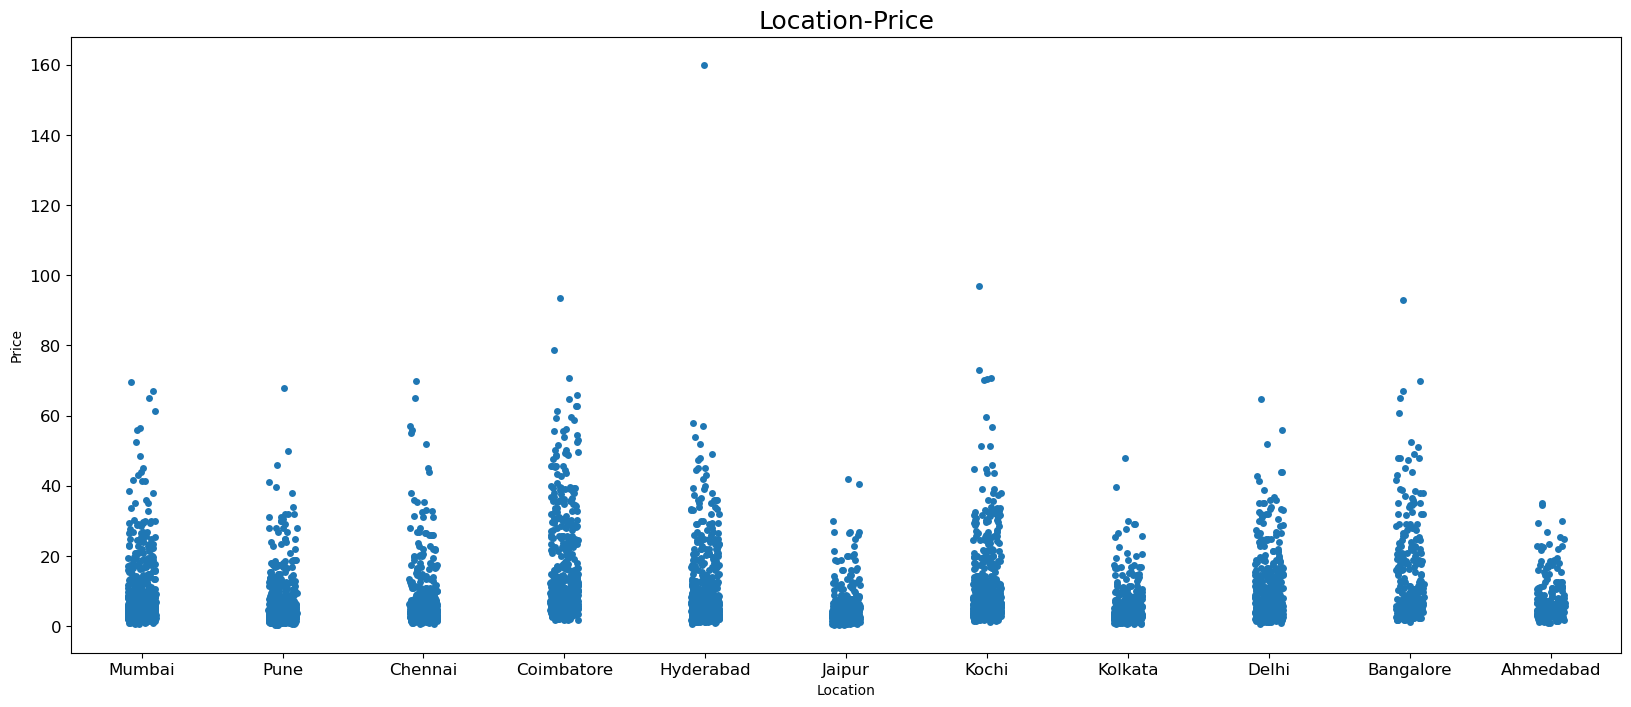

In [47]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Location', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Location-Price', fontsize=18)
plt.show()

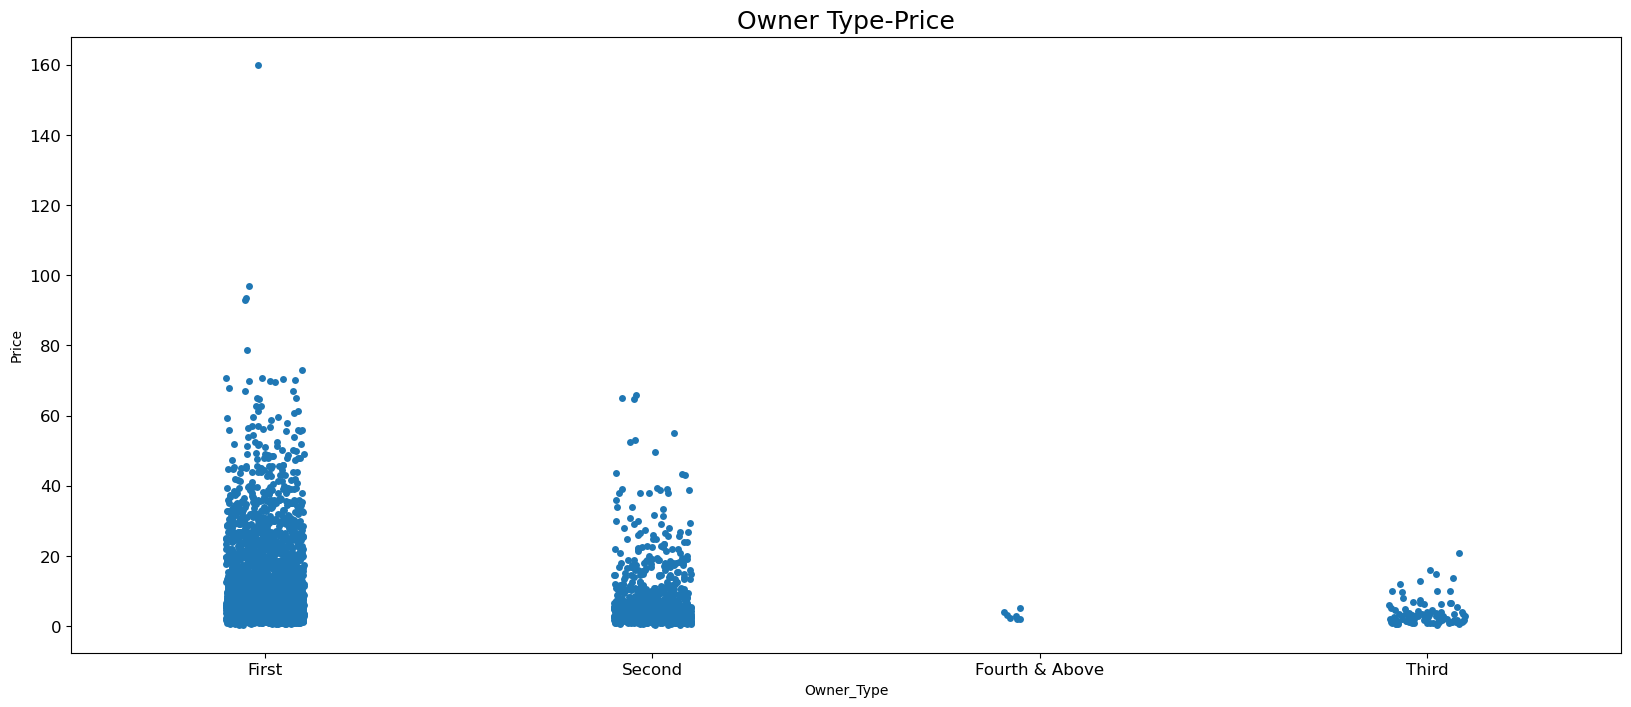

In [48]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Owner_Type', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Owner_Type')
plt.ylabel('Price')
plt.title('Owner Type-Price', fontsize=18)
plt.show()

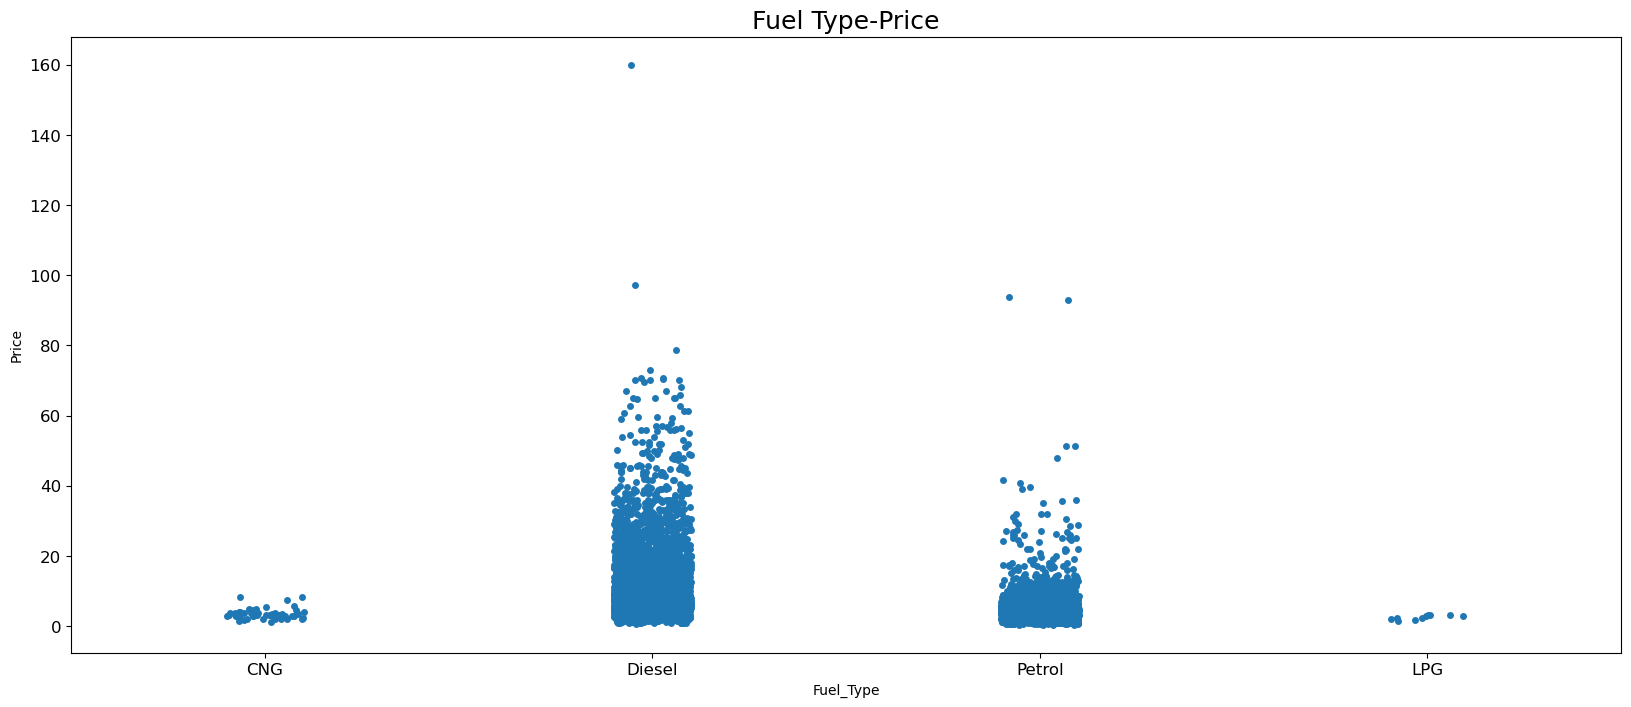

In [49]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Fuel_Type', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.title('Fuel Type-Price', fontsize=18)
plt.show()

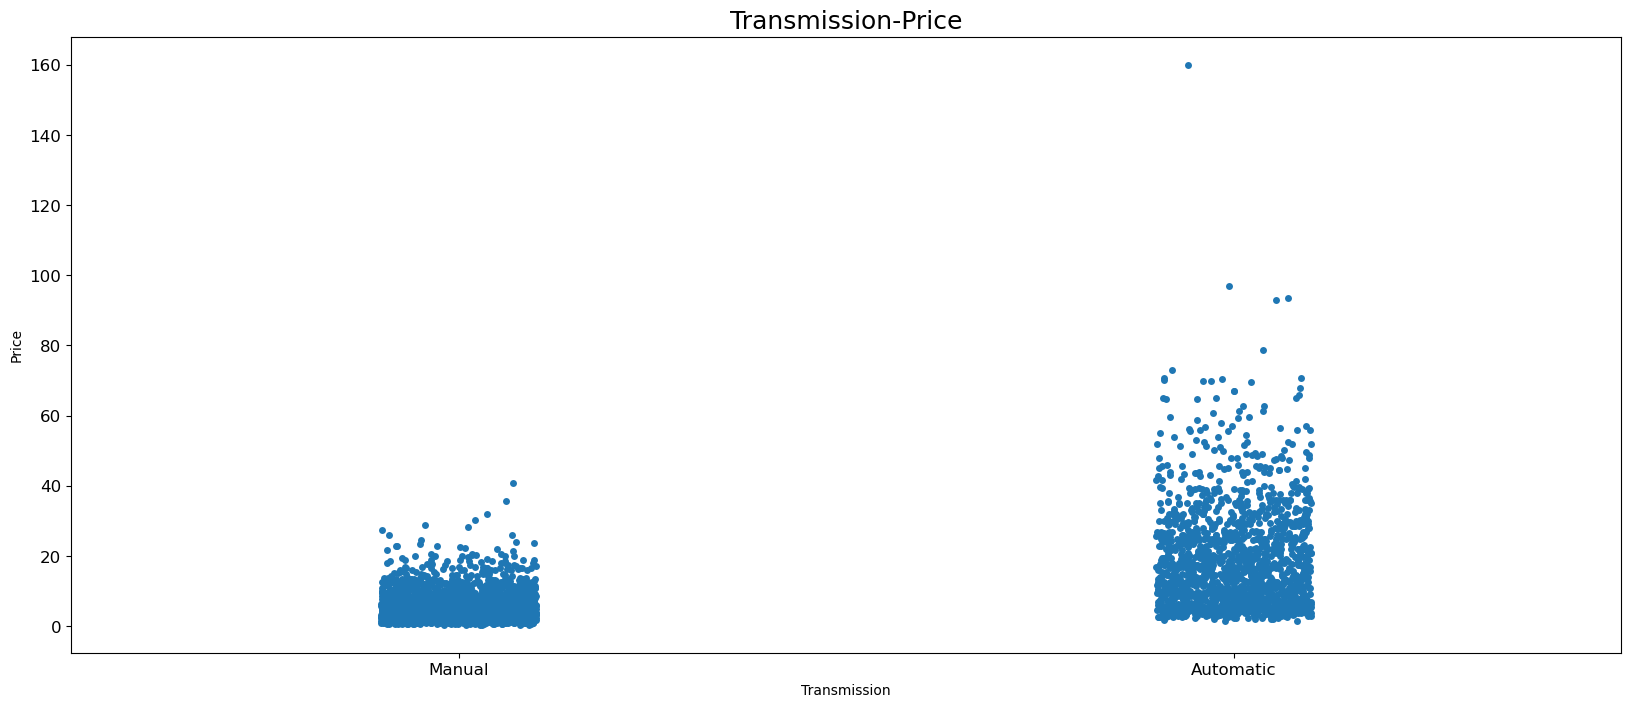

In [50]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Transmission', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Transmission-Price', fontsize=18)
plt.show()

<hr>

<h5>Sayısal Değişkenler için Çift Değişkenli Analiz</h5>

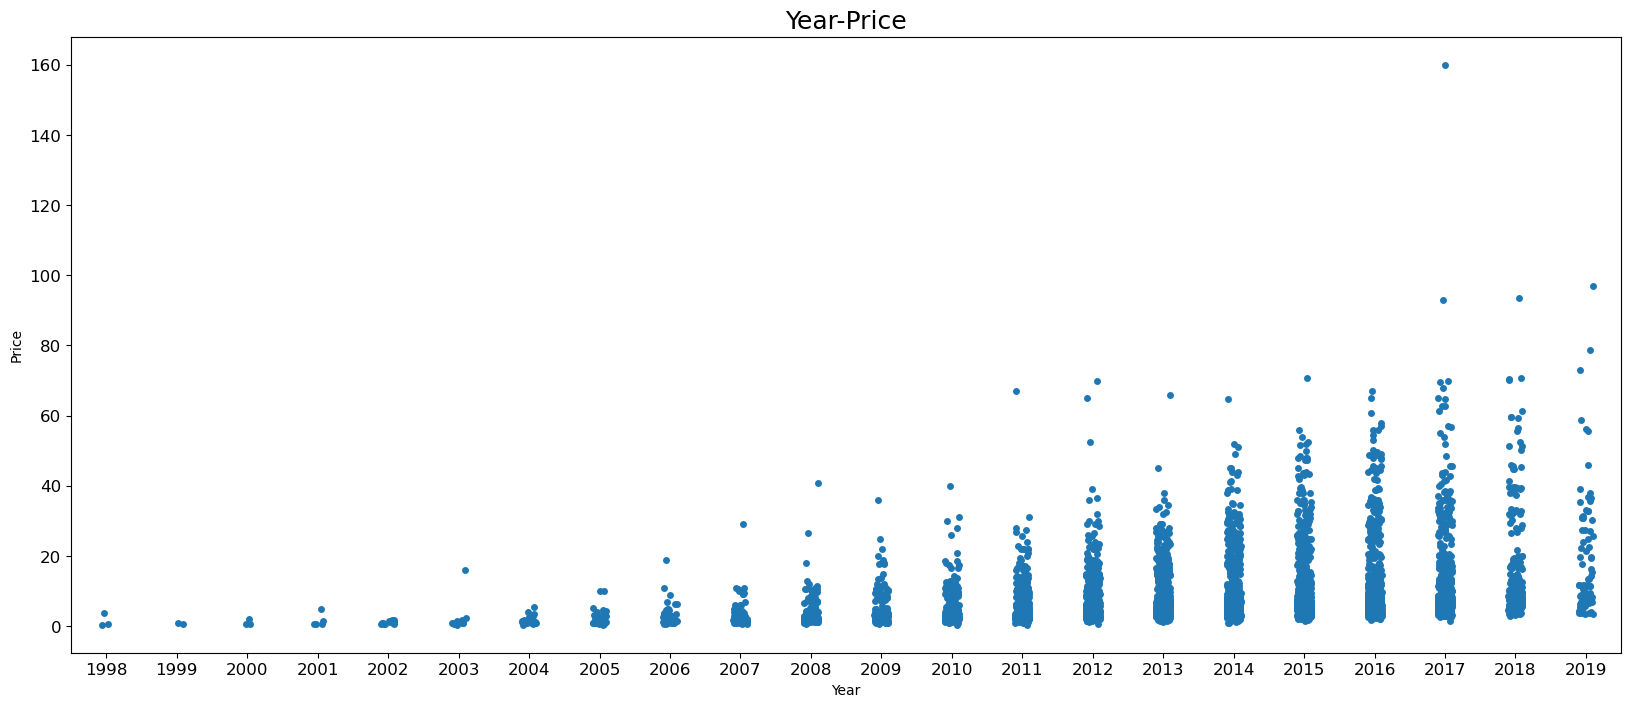

In [51]:
plt.figure(figsize=(20, 8), dpi=100)
sns.stripplot(data=df, x='Year', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year-Price', fontsize=18)
plt.show()

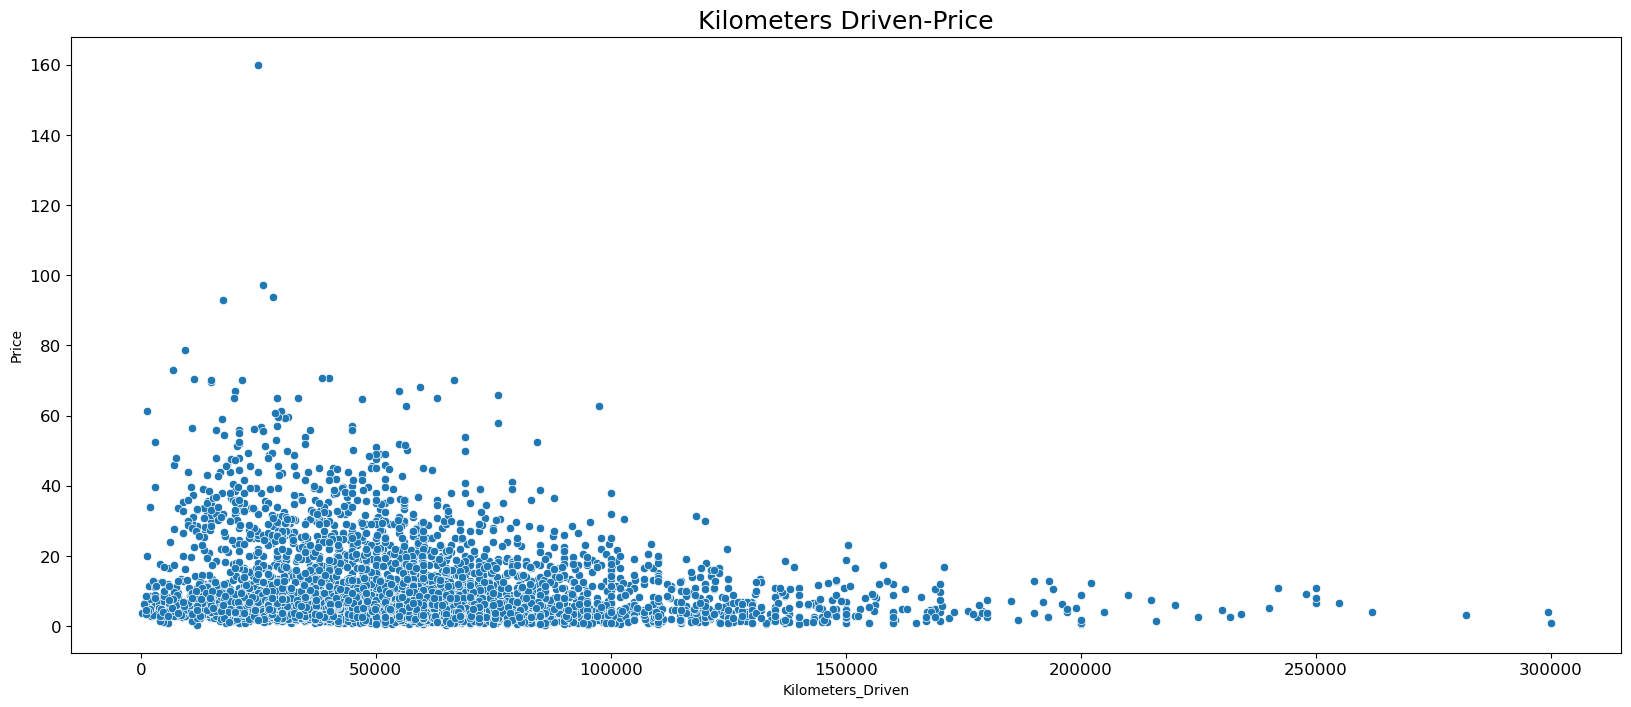

In [52]:
plt.figure(figsize=(20, 8), dpi=100)
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price') 
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.title('Kilometers Driven-Price', fontsize=18)
plt.show()

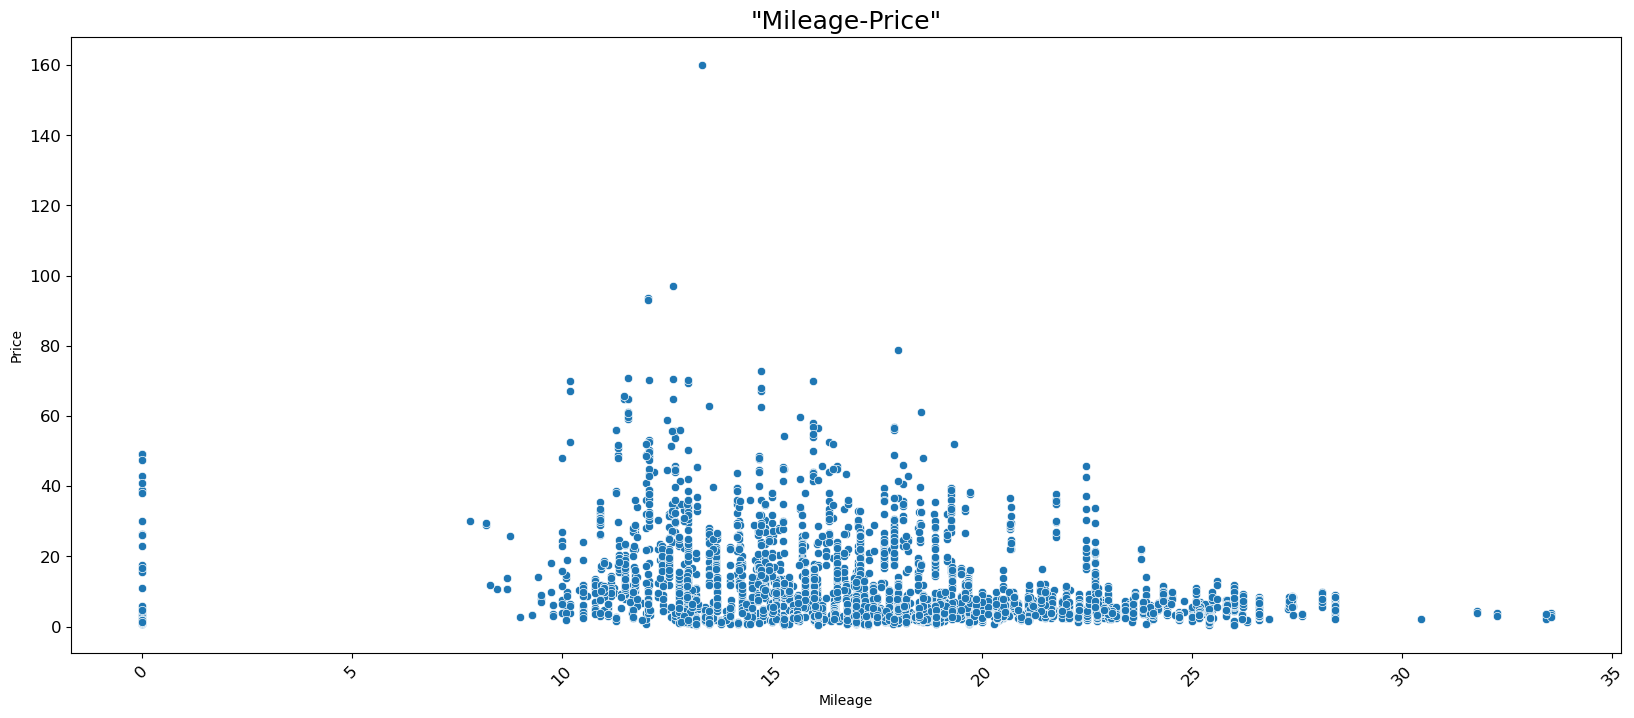

In [53]:
plt.figure(figsize=(20, 8), dpi=100)
graph = sns.scatterplot(data=df, x='Mileage',y='Price') 
plt.xticks(rotation=45, fontsize=12,)  
plt.yticks(fontsize=12) 
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('"Mileage-Price"', fontsize=18)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

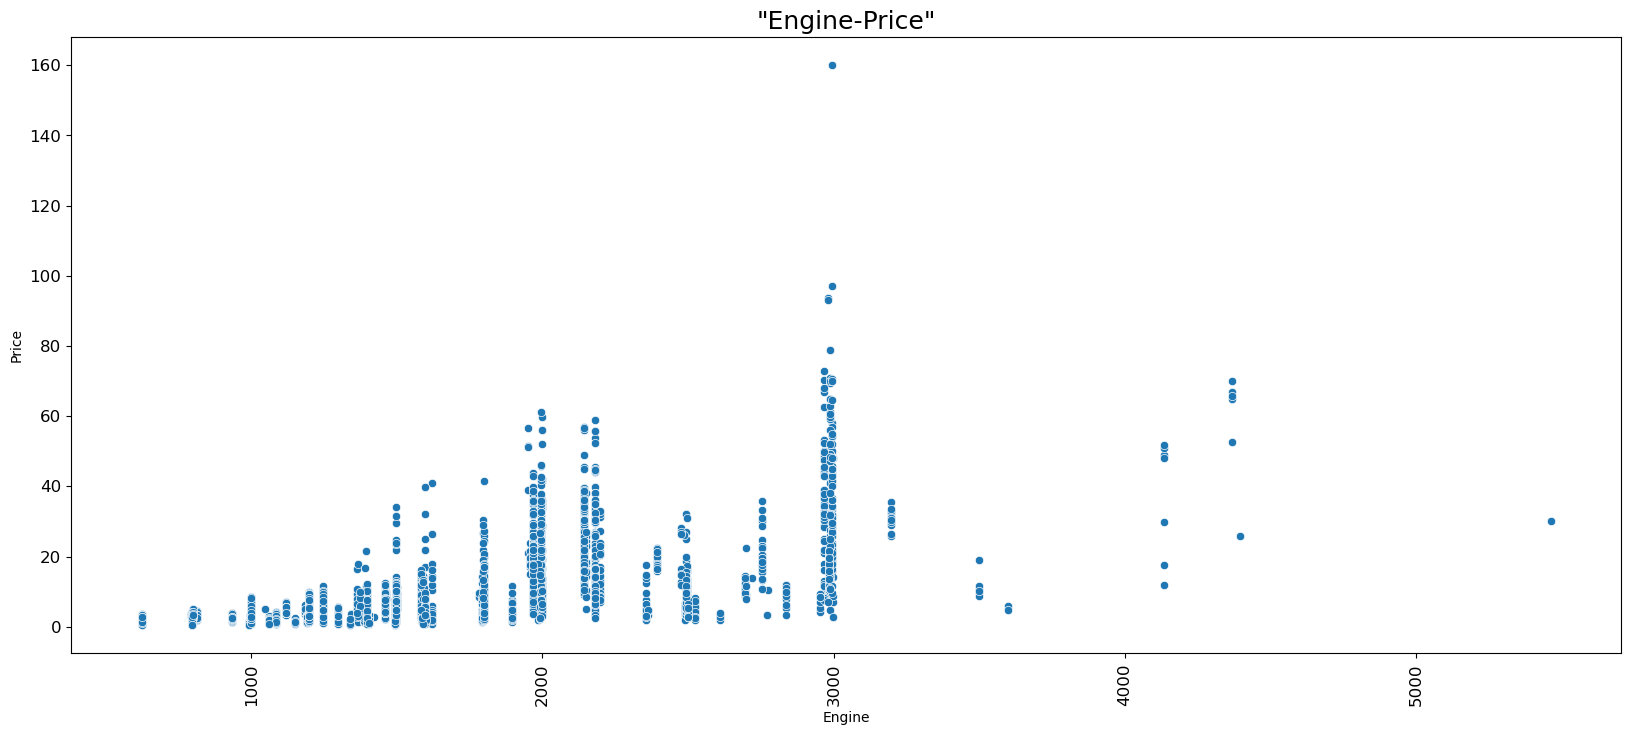

In [54]:
plt.figure(figsize=(20, 8), dpi=100)
graph = sns.scatterplot(data=df, x='Engine',y='Price') 
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('"Engine-Price"', fontsize=18)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

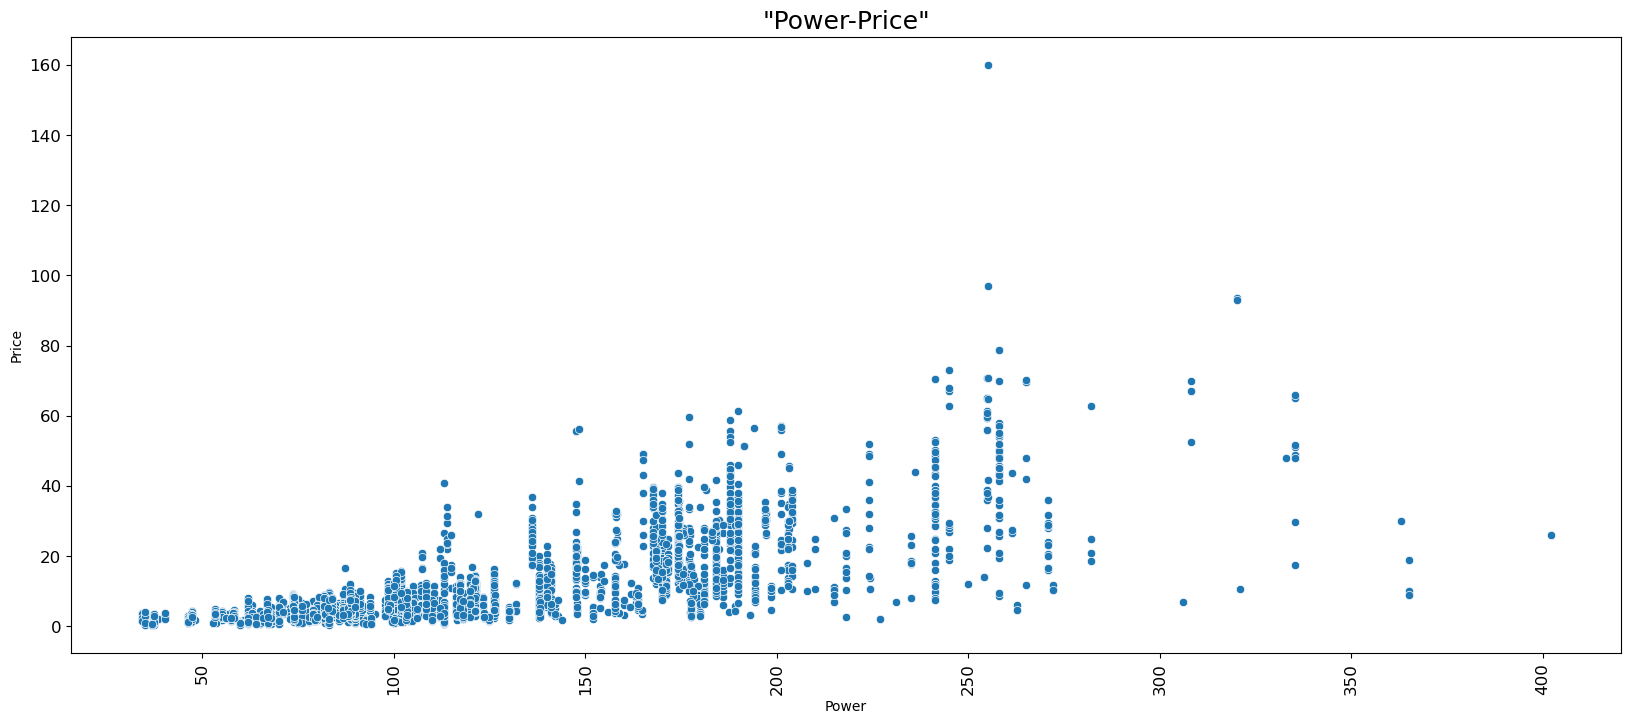

In [55]:
plt.figure(figsize=(20, 8), dpi=100)
graph = sns.scatterplot(data=df, x='Power',y='Price') 
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('"Power-Price"', fontsize=18)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

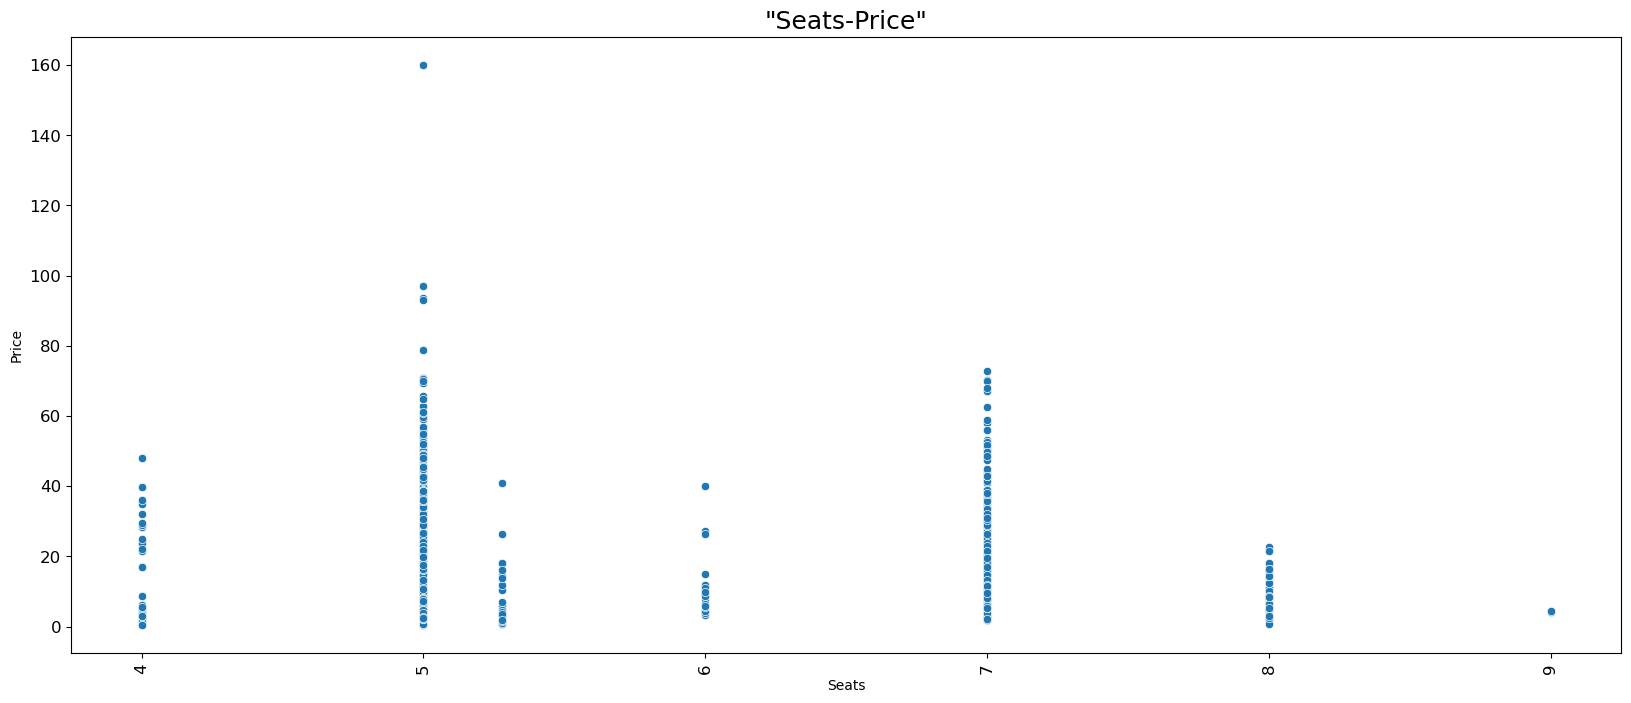

In [56]:
plt.figure(figsize=(20, 8), dpi=100)
graph = sns.scatterplot(data=df, x='Seats',y='Price') 
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12) 
plt.xlabel('Seats')
plt.ylabel('Price')
plt.title('"Seats-Price"', fontsize=18)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

Sonuç:
- En yüksek satış fiyatına sahip üretici Mini Cooper'dır. En düşük fiyatlı üretici Maruti Suzuki'dir. Bu veri seti Hindistan'dan alındığı için yerli üretici olan bir Hint markasının bunu herkese satması doğaldır.

- İkinci kullanıcı tarafından satılan araçlar, ilk kullanıcı tarafından satılan araçlardan daha ucuzdur.

- Benzinli araç fiyatları dizel araçlara göre daha düşüktür.

- Otomatik arabalar manuel araçlardan daha pahalıdır.

<hr>

<h5>Kategorik Değerlerin Dönüştürülmesi </h5>

In [57]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=CatCols, drop_first=True)
df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_bmw,Company_chevrolet,Company_fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,False,...,False,False,False,False,True,False,True,False,False,False


Regresyon modellemesi yapılırken, kategorik verilerin sayısal formata dönüştürülmesi genellikle önerilir. Bu dönüşüm, modelin kategorik verileri anlaması ve işlemesi için gereklidir.

<hr>

<h5>Korelasyon Matrisi</h5>

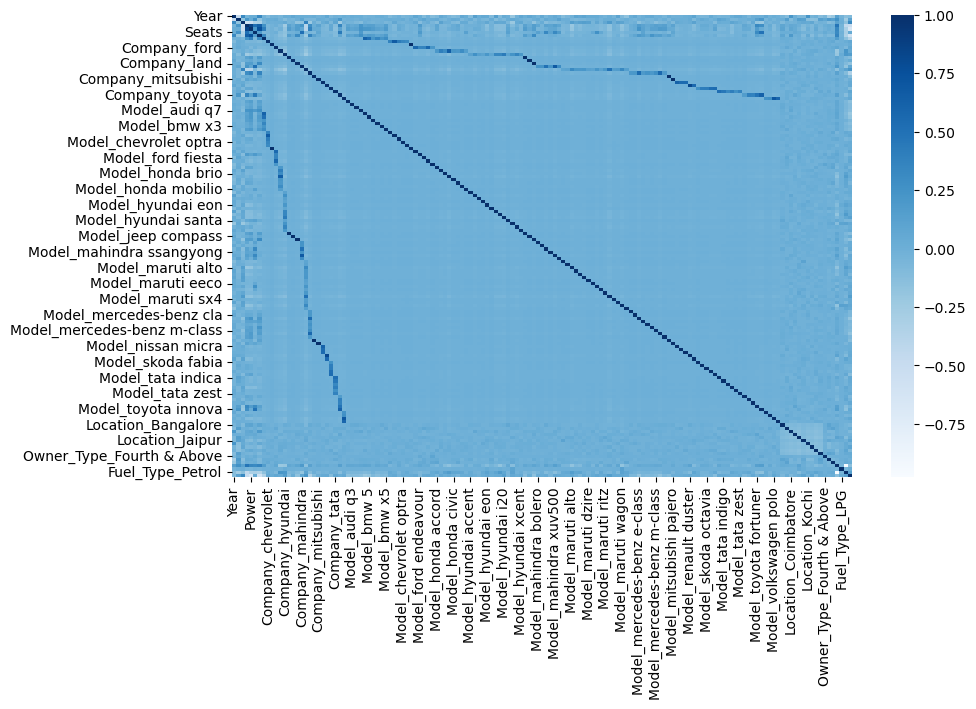

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='Blues')
plt.show()

<hr>

<h5> Doğrusal Regresyon </h5>

<h6>Özellikleri ve Hedef Değişkenleri Belirleme</h6>

In [59]:
X = df.drop('Price', axis=1)
y = df['Price']

<h6>Train-Test-Split</h6>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Veri Seti büyük olduğundan "test_size" değerinin 0,2 seçilmesi modelleme için yeterli olacaktır.

In [61]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4504, 146)
X_test shape:  (1126, 146)
y_train shape:  (4504,)
y_test shape:  (1126,)


<h6> Model Oluşturma </h6>

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<h5> Modelin Değerlendirilmesi </h5>

İstatistik ve veri analizi süreçlerinde kullanılan bazı performans ölçüleri vardır. Bu metrikler, bir modelin öngörücü yeteneğini ve başarısını değerlendirmek için kullanılır. Bu metrikler arasında Ortalama Mutlak Hata (MAE), Ortalama Kare Hatası (MSE), Kök Ortalama Kare Hatası (RMSE) ve R Kare Puanı (R ^ 2) bulunur.

Ortalama Mutlak Hata (MAE): Tahmin edilen değerler ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamasını ifade eder. Daha düşük bir MAE değeri, modelin daha iyi performans gösterdiğini ve tahminlerinin gerçek değerlere daha yakın olduğunu gösterir. Bu ölçüm, regresyon problemlerinde modelin doğruluğunu değerlendirmek için kullanılır.
Ortalama Kare Hatası (MSE): Tahmin edilen değerler ile gerçek değerler arasındaki kare farklarının ortalamasını temsil eder. Mse'nin değeri her zaman pozitiftir. MSE değeri genellikle büyük hata değerlerini vurgular çünkü büyük hataların etkisi farkların karesi alınarak artırılır. Regresyon problemlerinde modelin doğruluğunu değerlendirmek için kullanılır.
Kök Ortalama Kare Hatası (RMSE): mse'nin karekökü alınarak hesaplanır. RMSE, hataların orijinal ölçü birimine döndürülerek yorumlanmasına izin verir ve mse'nin bir türevidir. Regresyon problemlerinde modelin doğruluğunu değerlendirmek için kullanılır.
R-Kare Puanı (R ^ 2): Bir regresyon modelinin verilere ne kadar iyi uyduğunu ölçen bir metriktir. Bu puan, bağımlı değişken üzerindeki varyansın ne kadarının bağımsız değişkenlerle açıklandığını gösterir. R ^ 2, 0 ile 1 arasında bir değer alır.
Bu metrikler birlikte kullanıldığında, bir modelin performansını daha kapsamlı bir şekilde değerlendirebilirsiniz. Örneğin:

Daha düşük MAE ve RMSE değerleri, daha iyi bir modelin daha az hata yaptığını gösterir.
MSE ve RMSE arasında doğrudan bir ilişki vardır, çünkü RMSE mse'nin kareköküdür.
R-Kare Puanı, verilere uymanın ne kadar iyi olduğunu gösterir. 1'e ne kadar yakınsa, model verilere o kadar iyi uyar. 0'a yaklaştıkça, model verilere daha az sığabilir hale gelir.
Özetle, bu metrikleri birlikte kullanarak bir modelin performansını anlamak ve karşılaştırmak mümkündür. Daha düşük hata değerleri (MAE, MSE, RMSE) ve daha yüksek R-Kare Puanı daha iyi bir modelin varlığını gösterir.

In [63]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

Model değerlendirme metrikleri tanımlandı, model değerlendirme aşamasına geçilebilir.

<h5>Model Değerlendirmesi</h5>

In [64]:
y_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(lin_reg.score(X_train,y_train))
test_score.append(lin_reg.score(X_test,y_test))

MAE: 2.3443924047229734
MSE: 16.764687374503037
RMSE: 4.094470341143411
R2 Score: 0.8298880557305593


Model, verilerin% 83'ünü açıklıyor. Bu sonuçlar, modelin genel olarak iyi performans gösterdiğini, ancak bazı noktalarda iyileştirme fırsatları olabileceğini göstermektedir. Özellikle yüksek MSE değeri modelin bazı noktalarda büyük hatalar yaptığını düşündürebilir. Bu nedenle, modelin daha fazla iyileştirme potansiyeline sahip olduğunu düşünebiliriz.